In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
fields = ['Modal_Price', 'Price_Date']
df= pd.read_csv(r"C:\Users\rishi\Desktop\SIH final\soya_20240908_144445.csv",skipinitialspace=True, usecols=fields)

In [3]:
df.Price_Date = pd.to_datetime(df.Price_Date, errors='coerce')

In [4]:
df=df.set_index('Price_Date')

In [5]:
df.head(2)

,Modal_Price
Price_Date,
2010-04-06,227.792455
2010-04-13,239.988849


In [6]:
data = df.copy()
y = data

In [7]:
y

,Modal_Price
Price_Date,
2010-04-06,227.792455
2010-04-13,239.988849
2010-04-20,225.047147
2010-04-28,259.764600
2010-05-05,248.774457
...,...
2017-04-12,203.431162
2017-04-19,210.571447
2017-04-27,237.145020


In [8]:
# The 'MS' string groups the data in buckets by start of the month
y = y['Modal_Price'].resample('MS').mean()

# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())

print(y)

Price_Date
2010-04-01    238.148263
2010-05-01    240.723299
2010-06-01    242.829003
2010-07-01    242.818608
2010-08-01    257.890873
                 ...    
2017-01-01    213.121977
2017-02-01    215.724357
2017-03-01    219.519420
2017-04-01    215.660996
2017-05-01    224.074588
Freq: MS, Name: Modal_Price, Length: 86, dtype: float64


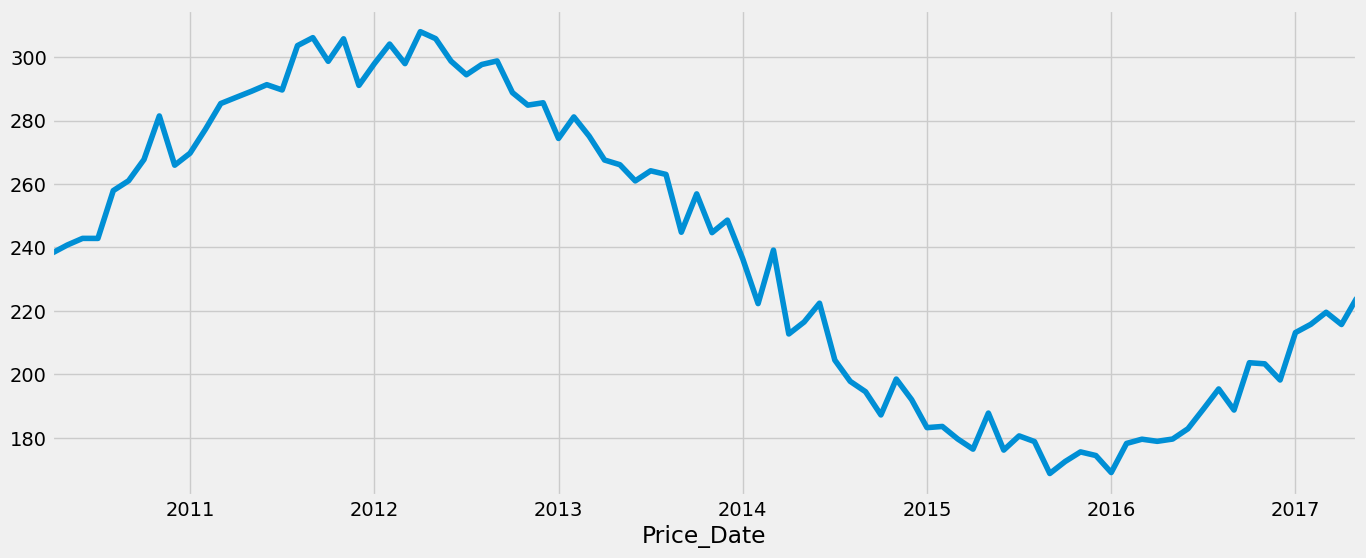

In [9]:
y.plot(figsize=(15, 6))
plt.show()

In [10]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [11]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1176.8804564904437
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:944.3713529361243
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:730.1981116870985
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:582.059146942145
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:735.3935215084539
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:702.296463238803
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:606.7972495051293
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:600.9883131229795
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1054.3230673650805
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:839.2356274516524
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:654.2027450123787
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:541.1541432542296
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:669.6321337826968
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:647.2724843024562
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:562.5909345548615
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:543.1493277208675
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:600.2912579152946
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:516.9627550122913
ARIMA(0, 1

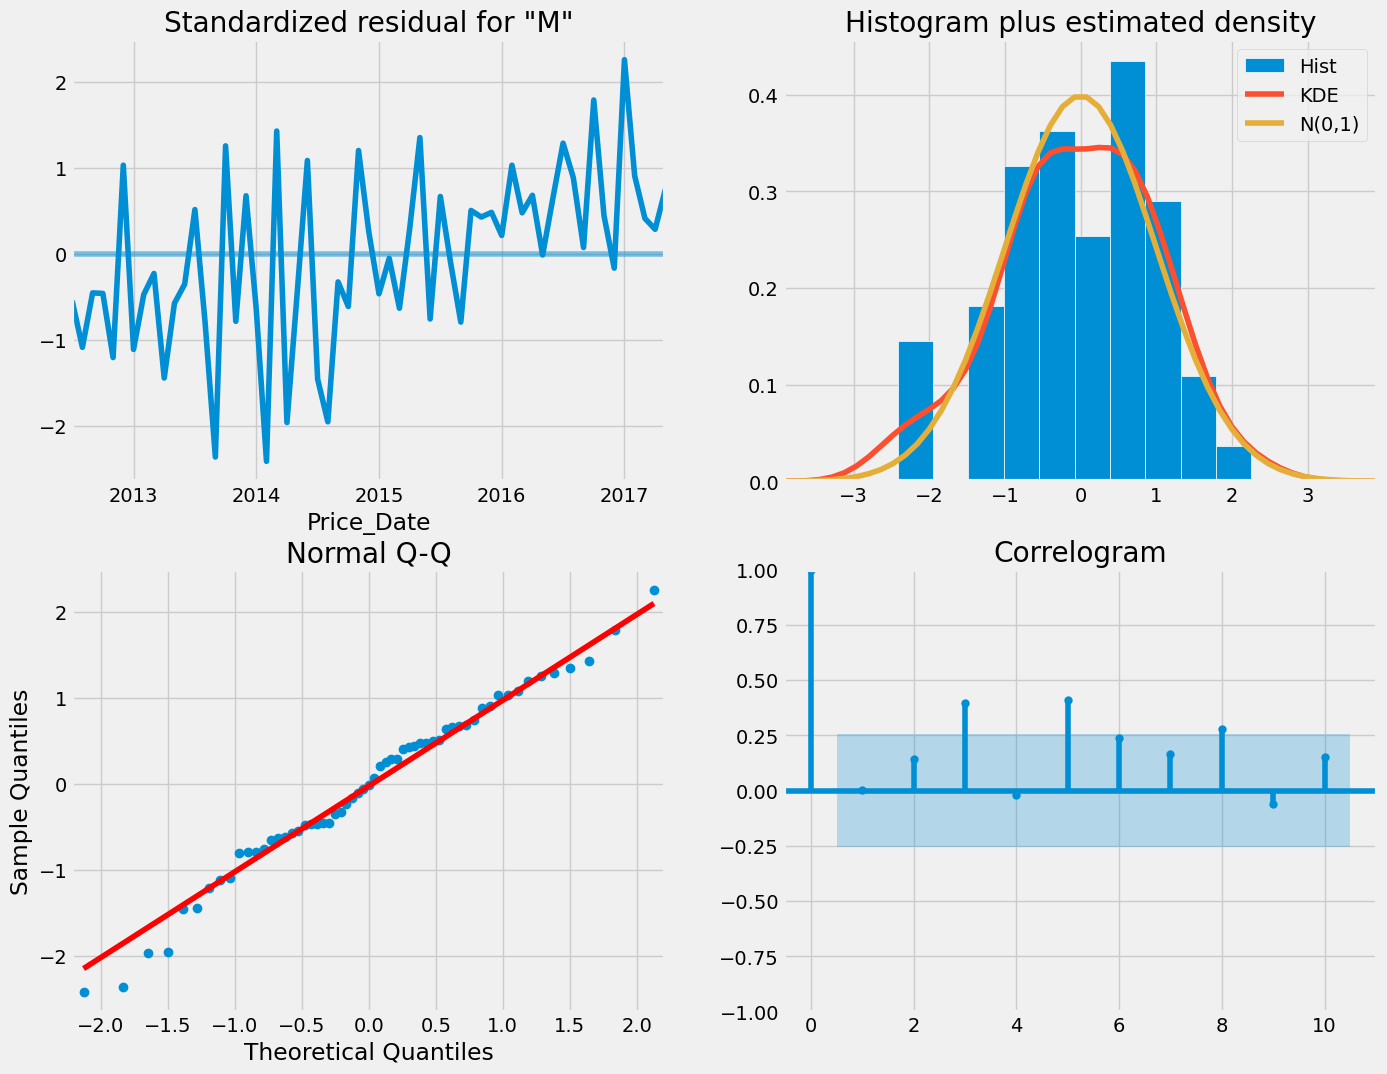

In [12]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [13]:
date_to_predict = input("enter date from which you want to  predict:")

In [14]:
pred = results.get_prediction(start=pd.to_datetime(date_to_predict), dynamic=False)
pred_ci = pred.conf_int()

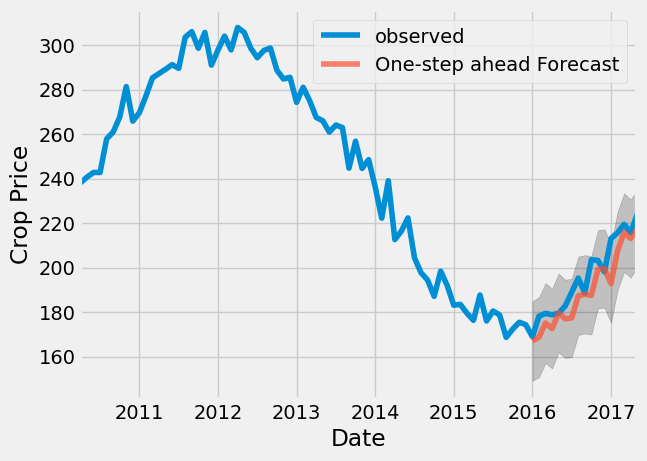

In [15]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Crop Price')
plt.legend()

plt.show()

In [16]:
y_forecasted = pred.predicted_mean
y_truth = y[date_to_predict:]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 70.37


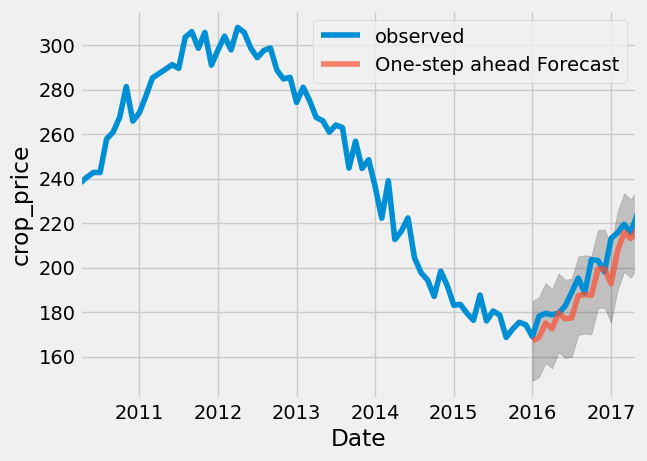

In [17]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('crop_price')
plt.legend()

plt.show()

In [18]:
y_forecasted = pred.predicted_mean
y_truth = y[date_to_predict:]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 70.37


In [19]:
pred_dynamic = results.get_prediction(start=pd.to_datetime(date_to_predict), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

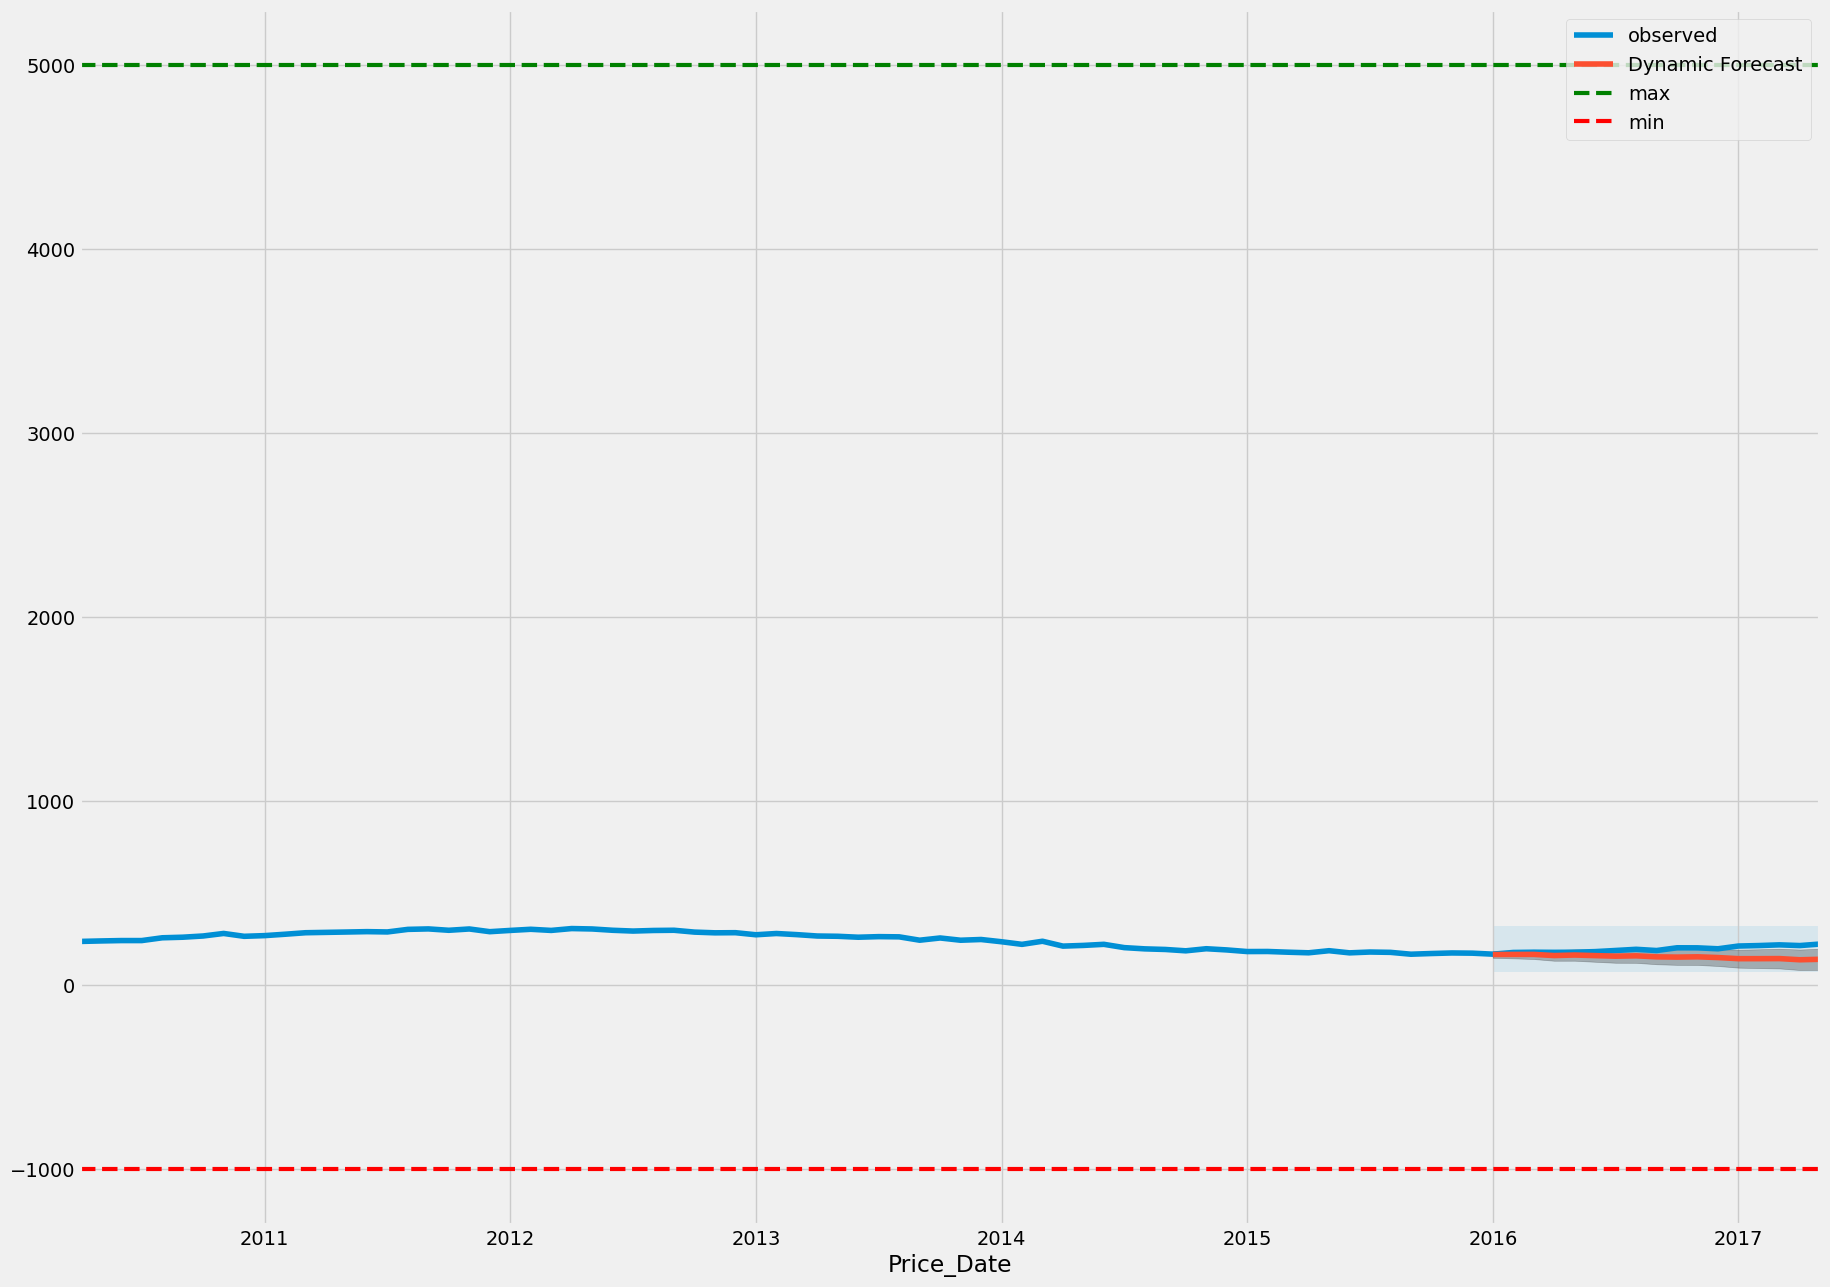

In [20]:
ax = y['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime(date_to_predict), y.index[-1],
                 alpha=.1, zorder=-1)

ax.hlines(y=5000, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='green', linewidth=3, linestyles='--', label='max')
ax.hlines(y=-1000, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='red', linewidth=3, linestyles='--', label='min')

plt.legend()
plt.show()

In [21]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y[date_to_predict:]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2357.07


In [22]:
# Get forecast 20 steps ahead in future
pred_uc = results.get_forecast(steps=20)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

In [23]:
pred_ci

,lower Modal_Price,upper Modal_Price
2017-06-01,202.615418,237.358808
2017-07-01,198.628935,239.793565
2017-08-01,197.373664,246.138318
2017-09-01,188.875144,243.601073
2017-10-01,187.499909,247.773089
2017-11-01,186.239858,251.539202
2017-12-01,179.605018,249.585943
2018-01-01,175.486561,249.850138
2018-02-01,175.367611,253.871245
2018-03-01,174.614286,257.047921


In [24]:
# Get the lowest modal price from the lower Modal_Price column
lowest_modal_price = pred_ci['lower Modal_Price'].min()

# Get the highest modal price from the upper Modal_Price column
highest_modal_price = pred_ci['upper Modal_Price'].max()

# Print the results
print(f"Lowest Modal Price: {lowest_modal_price:.2f}")
print(f"Highest Modal Price: {highest_modal_price:.2f}")

Lowest Modal Price: 142.23
Highest Modal Price: 267.14


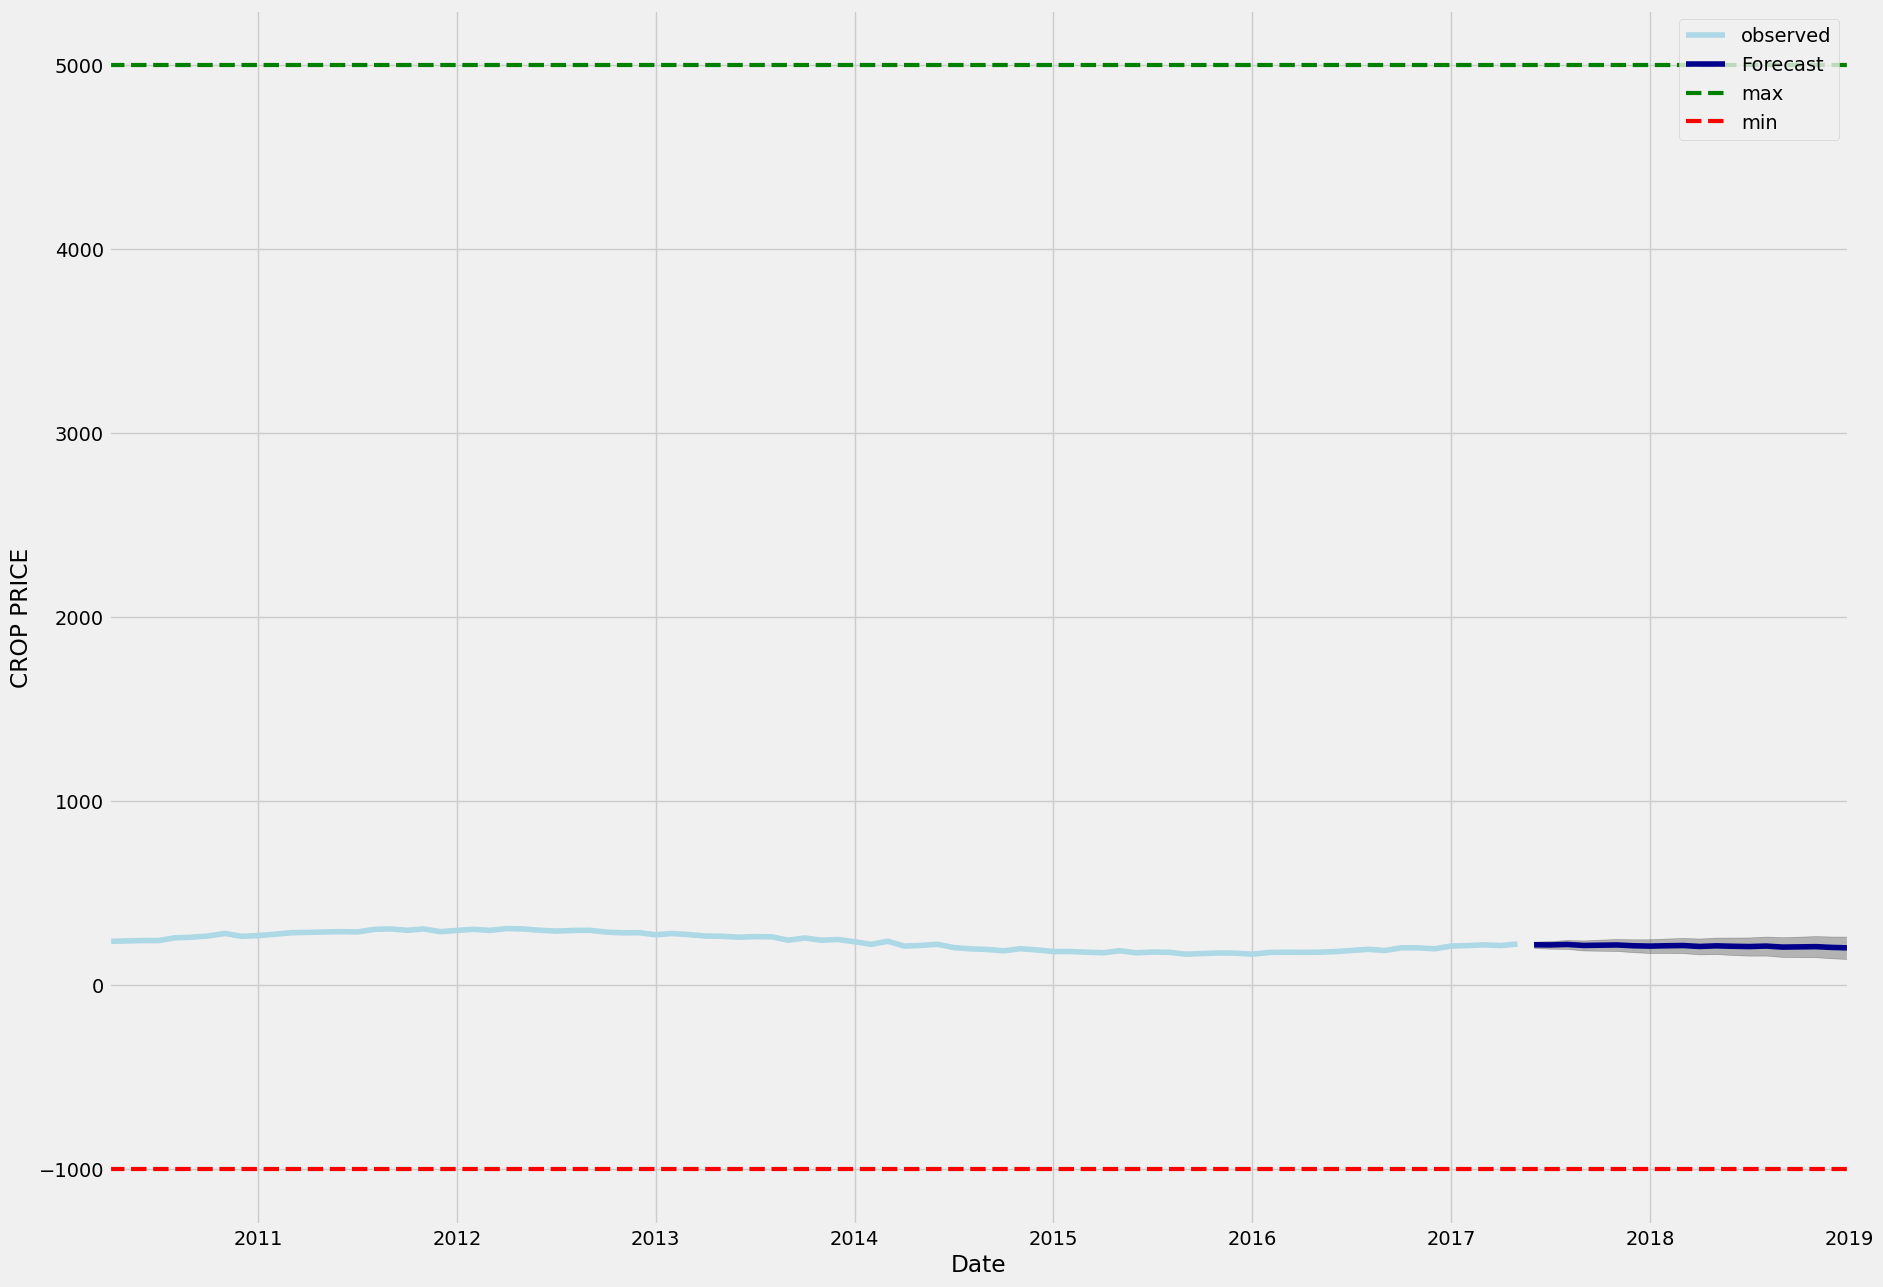

In [25]:
import matplotlib.pyplot as plt

# Your existing plot code
ax = y.plot(label='observed', figsize=(20, 15), color='lightblue')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast', color='darkblue')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('CROP PRICE')

# Add bold horizontal lines with labels
ax.hlines(y=5000, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='green', linewidth=3, linestyles='--', label='max')
ax.hlines(y=-1000, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='red', linewidth=3, linestyles='--', label='min')

plt.legend()
plt.show()